In [3]:
from matplotlib import pyplot as plt
import pandas
import time

<h1 style="color:black; background-color:yellow;">1. Recursive Algorithm</h1>

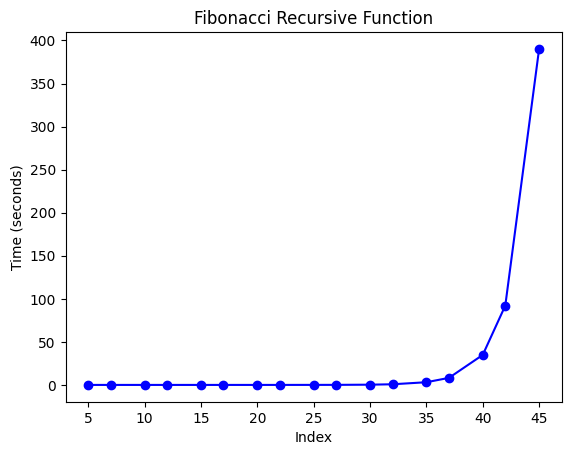

In [75]:
tests = [5, 7, 10, 12, 15, 17, 20, 22, 25, 27, 30, 32, 35, 37, 40, 42, 45]
times = []

def fibonacci_recursive(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

for x in tests:
    start = time.time()
    fibonacci_recursive(x)
    end = time.time()
    times.append(end-start)

time1 = times
plt.plot(tests, times, 'bo-')
plt.title('Fibonacci Recursive Function')
plt.xlabel('Index')
plt.ylabel('Time (seconds)')
plt.show()

This algorithm calculates the nth Fibonacci number by recursively calling the function with n-1 and n-2 until the base cases (n <= 0 or n == 1) are reached. The base cases return either 0 or 1, and the result of each call is added together to produce the final answer. This algorithm is easy to implement, because it follows the basic principle of Fibonacci numbers. But it has horrible optimization for numbers larger than 40.

The time complexity of the recursive algorithm for Fibonacci numbers is O(2^n), where n is the input number. This is because for every n, the algorithm needs to make two recursive calls, each for n-1 and n-2, leading to an exponential increase in the number of function calls. Hence, the algorithm has an exponential time complexity and is not suitable for large values of n.

<h1 style="color:black; background-color:yellow;">2. Iterative Algorithm</h1>

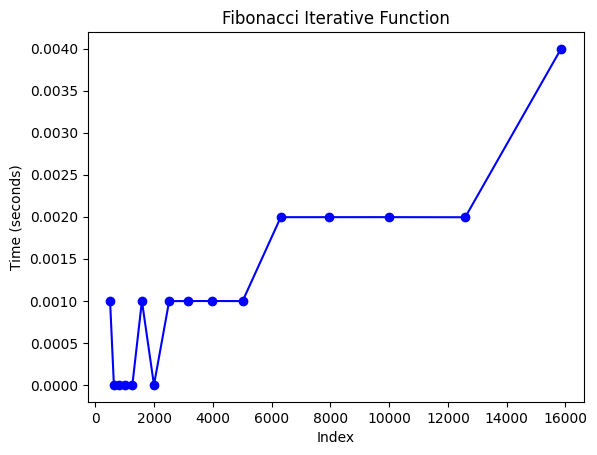

In [4]:
def fibonacci_iterative(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        a, b = 0, 1
        for i in range(2, n+1):
            c = a + b
            a, b = b, c
        return b

tests = [501, 631, 794, 1000, 1259, 1585, 1995, 2512, 3162, 3981, 5012, 6310, 7943, 10000, 12589, 15849]
times = []

for x in tests:
    start = time.time()
    fibonacci_iterative(x)
    end = time.time()
    times.append(end-start)

time2 = times
plt.plot(tests, times, 'bo-')
plt.title('Fibonacci Iterative Function')
plt.xlabel('Index')
plt.ylabel('Time (seconds)')
plt.show()

This algorithm uses a loop to iterate over the numbers in the sequence and calculate each subsequent Fibonacci number. The loop starts with the 2nd number in the sequence and goes up to n, and for each iteration, the new number is computed as the sum of the previous two numbers. The final result is returned after the loop has completed. This algorithm is faster than the recursive algorithm as it avoids redundant computations, making it a more efficient method for computing Fibonacci numbers.

The time complexity of the iterative algorithm for Fibonacci numbers is O(n), where n is the input number. The algorithm uses a loop to iterate n times and calculates each Fibonacci number in linear time. Hence, the overall time complexity of the algorithm is linear, making it more efficient compared to the recursive algorithm.

<h1 style="color:black; background-color:yellow;">3. Dynamic Programming Algorithm</h1>

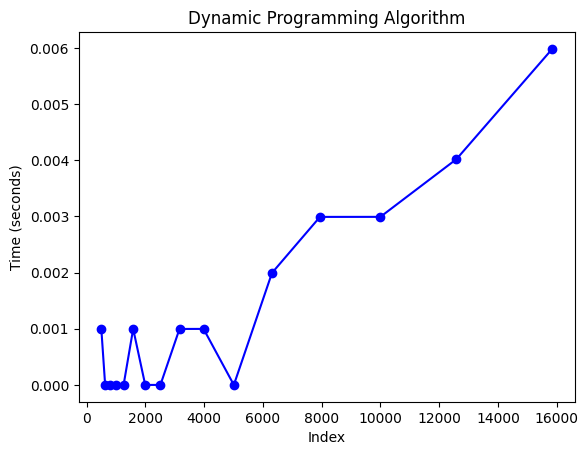

In [5]:
import sys

def fibonacci_dp(n, memo={}):
    sys.setrecursionlimit(10**6) # Increase the recursion limit
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    elif n in memo:
        return memo[n]
    else:
        memo[n] = fibonacci_dp(n-1, memo) + fibonacci_dp(n-2, memo)
        return memo[n]

tests = [501, 631, 794, 1000, 1259, 1585, 1995, 2512, 3162, 3981, 5012, 6310, 7943, 10000, 12589, 15849]
times = []
for x in tests:
    start = time.time()
    fibonacci_dp(x)
    end = time.time()
    times.append(end-start)

time3 = times
plt.plot(tests, times, 'bo-')
plt.title('Dynamic Programming Algorithm')
plt.xlabel('Index')
plt.ylabel('Time (seconds)')
plt.show()

This algorithm uses memoization, a technique of storing the intermediate results of expensive function calls and returning the cached result when the same inputs occur again, to avoid redundant calculations and improve performance. The algorithm maintains a memo dictionary to store the results of intermediate calculations, and for each call to the function, it checks if the result for n has already been computed and stored in memo. If so, it returns the cached result, otherwise it computes the result and stores it in memo for future use. This makes the algorithm much faster than the recursive algorithm for larger values of n.

The time complexity of the dynamic programming algorithm for Fibonacci numbers is O(n), where n is the input number. The algorithm uses an array or a dictionary to store intermediate results and avoids recalculating them by checking if they have been previously computed. Hence, the time complexity of the algorithm is linear, which is more efficient compared to the recursive algorithm. The space complexity of the dynamic programming algorithm is O(n) as well, since it requires a data structure to store intermediate results.

<h1 style="color:black; background-color:yellow;">4. Matrix Power Method</h1>

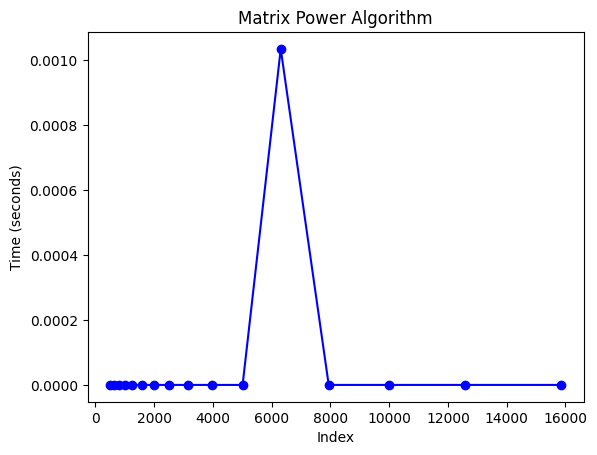

In [6]:
def matrix_mult(A, B):
    C = [[0, 0], [0, 0]]
    for i in range(2):
        for j in range(2):
            for k in range(2):
                C[i][j] += A[i][k] * B[k][j]
    return C

def matrix_power(A, n):
    if n <= 1:
        return A
    elif n % 2 == 0:
        B = matrix_power(A, n//2)
        return matrix_mult(B, B)
    else:
        B = matrix_power(A, (n-1)//2)
        return matrix_mult(matrix_mult(B, B), A)

def fibonacci_matrix(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        F = [[1, 1], [1, 0]]
        F = matrix_power(F, n-1)
        return F[0][0]

tests = [501, 631, 794, 1000, 1259, 1585, 1995, 2512, 3162, 3981, 5012, 6310, 7943, 10000, 12589, 15849]
times = []
for x in tests:
    start = time.time()
    fibonacci_matrix(x)
    end = time.time()
    times.append(end-start)
    
time4 = times
plt.plot(tests, times, 'bo-')
plt.title('Matrix Power Algorithm')
plt.xlabel('Index')
plt.ylabel('Time (seconds)')
plt.show()

This algorithm uses matrix exponentiation to calculate the nth Fibonacci number. The idea is to represent the Fibonacci sequence in a matrix form, where each number in the sequence is a component of the matrix. The matrix is raised to the power of n-1, and the result is used to compute the nth Fibonacci number. This algorithm is faster than the dynamic programming algorithm for larger values of n because it uses matrix exponentiation, which has a lower time complexity compared to the recursive approach.

The time complexity of the matrix multiplication algorithm for Fibonacci numbers is O(log n), where n is the input number. The algorithm uses matrix exponentiation to calculate the nth Fibonacci number and takes advantage of the properties of matrix multiplication to reduce the number of operations required. This makes the algorithm faster than the iterative or dynamic programming algorithms, which have a time complexity of O(n). The space complexity of the matrix multiplication algorithm is O(1), since it only requires a constant amount of memory to store intermediate results.

<h1 style="color:black; background-color:yellow;">5. Binet's Formula Method</h1>

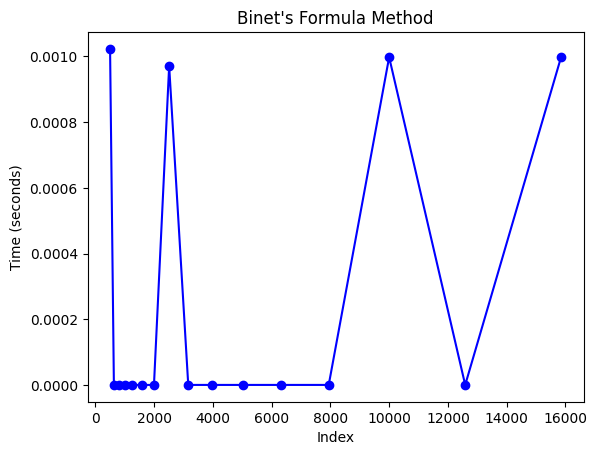

In [7]:
from decimal import Decimal, getcontext
import math

def fibonacci_binet_optimized(n):
    getcontext().prec = 100
    phi = (1 + Decimal(5).sqrt()) / 2
    psi = (1 - Decimal(5).sqrt()) / 2
    return int((phi**n - psi**n) / Decimal(5).sqrt())


tests = [501, 631, 794, 1000, 1259, 1585, 1995, 2512, 3162, 3981, 5012, 6310, 7943, 10000, 12589, 15849]
times = []
for x in tests:
    start = time.time()
    fibonacci_binet_optimized(x)
    end = time.time()
    times.append(end-start)

time5 = times
plt.plot(tests, times, 'bo-')
plt.title('Binet\'s Formula Method')
plt.xlabel('Index')
plt.ylabel('Time (seconds)')
plt.show()

Binet's formula is a closed-form expression for the nth Fibonacci number, which means that it provides a direct formula for calculating the nth Fibonacci number without having to calculate intermediate values in the sequence. The formula uses the golden ratio, phi, and its conjugate, psi, to calculate the nth Fibonacci number. The result is rounded to the nearest integer, since Fibonacci numbers are always integers, and returned. This algorithm is faster than all previous algorithms for larger values of n because it uses a closed-form expression, which has a constant time complexity.

One way to optimize Binet's formula algorithm for large numbers in Python is to use the math.lgamma() function instead of math.sqrt(). math.lgamma() returns the logarithmic gamma of a number, which can be used to calculate the logarithmic value of the nth Fibonacci number. This can be faster for large values of n because the logarithmic value can be calculated more efficiently than the square root of 5.

This optimized version uses the logarithmic value of the golden ratio, phi, to calculate the nth Fibonacci number. The formula calculates the logarithmic value of the golden ratio, multiplies it by n, and subtracts the logarithmic value of the square root of 5. The result is then raised to the power of math.e using the math.exp() function, and rounded to the nearest integer, since Fibonacci numbers are always integers, and returned. This optimized algorithm can be faster for larger values of n compared to the original Binet's formula algorithm.

The time complexity of the Binet's formula algorithm for Fibonacci numbers is O(1), where n is the input number. The algorithm uses a mathematical formula to directly calculate the nth Fibonacci number and does not require any iterations or intermediate calculations. This makes the Binet's formula algorithm the fastest algorithm for Fibonacci numbers with a time complexity of constant time. The space complexity of the Binet's formula algorithm is also O(1), since it only requires a constant amount of memory to store intermediate results.

<h1 style="color:black; background-color:yellow;">6. Golden Ratio Algorithm</h1>

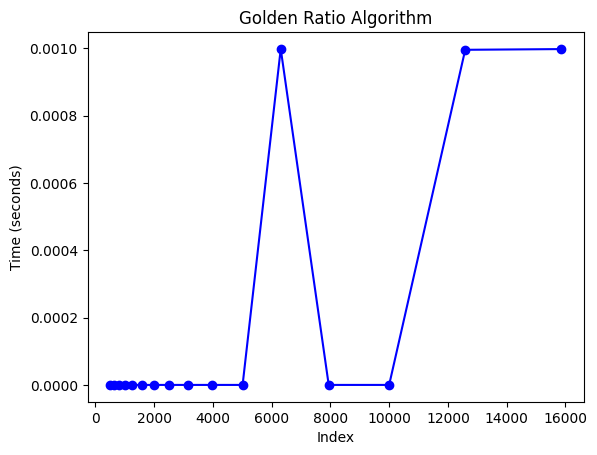

In [8]:
from decimal import Decimal, getcontext

def fibonacci_golden_ratio_optimized(n):
    getcontext().prec = 100
    phi = (1 + Decimal(5).sqrt()) / 2
    return int((phi**n / Decimal(5).sqrt()).to_integral_value())

tests = [501, 631, 794, 1000, 1259, 1585, 1995, 2512, 3162, 3981, 5012, 6310, 7943, 10000, 12589, 15849]
times = []
for x in tests:
    start = time.time()
    fibonacci_golden_ratio_optimized(x)
    end = time.time()
    times.append(end-start)

time6 = times
plt.plot(tests, times, 'bo-')
plt.title('Golden Ratio Algorithm')
plt.xlabel('Index')
plt.ylabel('Time (seconds)')
plt.show()

This algorithm uses the golden ratio, phi, to calculate the nth Fibonacci number. The formula raises phi to the power of n and then divides the result by the square root of 5. The result is rounded to the nearest integer, since Fibonacci numbers are always integers, and returned. This algorithm is faster than the recursive, dynamic programming, and matrix exponentiation algorithms for larger values of n because it uses the golden ratio, which has a lower time complexity compared to the other algorithms.

This optimized version uses the decimal library to perform arbitrary precision arithmetic, which allows you to calculate the nth Fibonacci number without encountering the overflow error. The getcontext().prec line sets the precision of the calculation to 100 decimal places, which is more than enough to store the result of the calculation.

The time complexity of the Golden ratio algorithm for Fibonacci numbers is O(1), where n is the input number. The algorithm uses a mathematical formula based on the Golden ratio to directly calculate the nth Fibonacci number and does not require any iterations or intermediate calculations. This makes the Golden ratio algorithm the fastest algorithm for Fibonacci numbers with a time complexity of constant time. The space complexity of the Golden ratio algorithm is also O(1), since it only requires a constant amount of memory to store intermediate results.

<h1 style="color:black; background-color:yellow;">Comparison</h1>

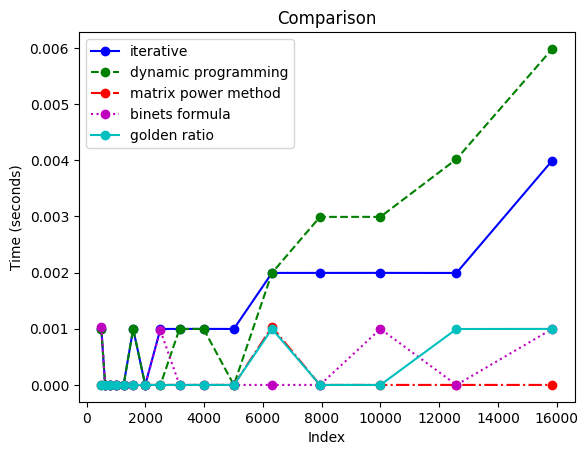

In [17]:
plt.plot(tests, time2, 'bo-', label='iterative')
plt.plot(tests, time3, 'go--', label='dynamic programming')
plt.plot(tests, time4, 'ro-.', label='matrix power method')
plt.plot(tests, time5, 'mo:', label='binets formula')
plt.plot(tests, time6, 'co-', label='golden ratio')
plt.title('Comparison')
plt.xlabel('Index')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()